In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import missingno as msno

In [4]:
import sklearn

In [5]:
path = 'E:\PycharmProjects\Practice Python\KN\Feature Engineering\datasets\\titanic\\train.csv'

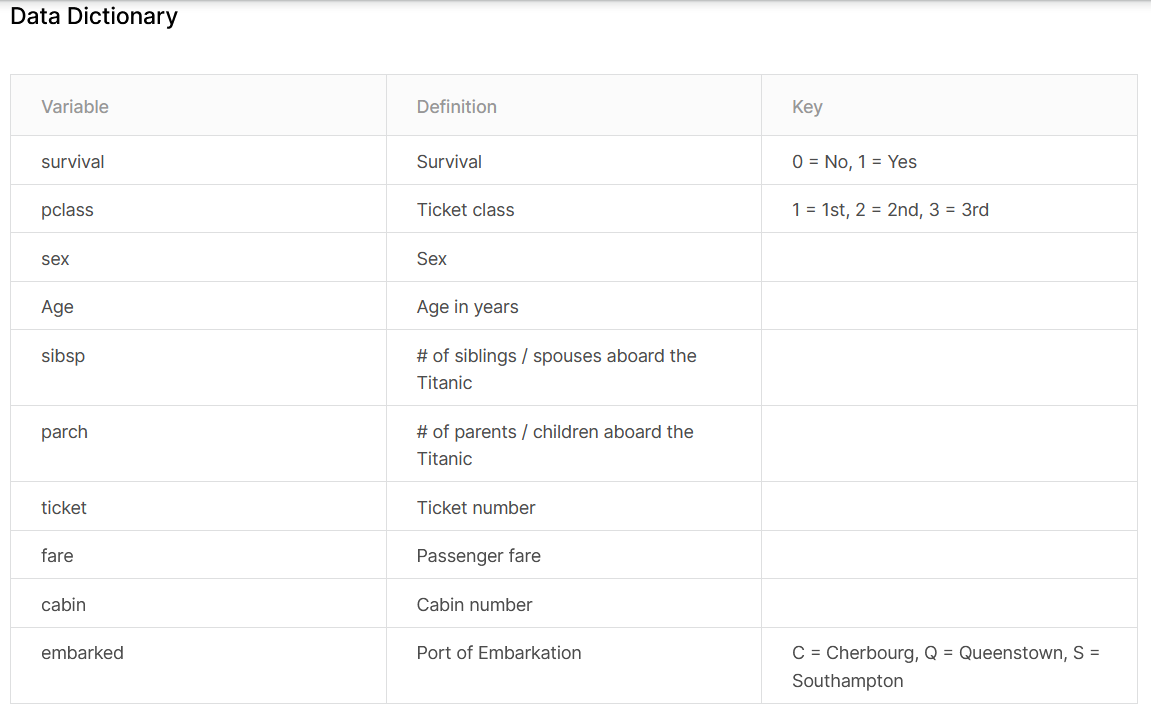

In [6]:
df = pd.read_csv(path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
## Checking out the total no of missing values:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualizing Missing Values

<AxesSubplot:>

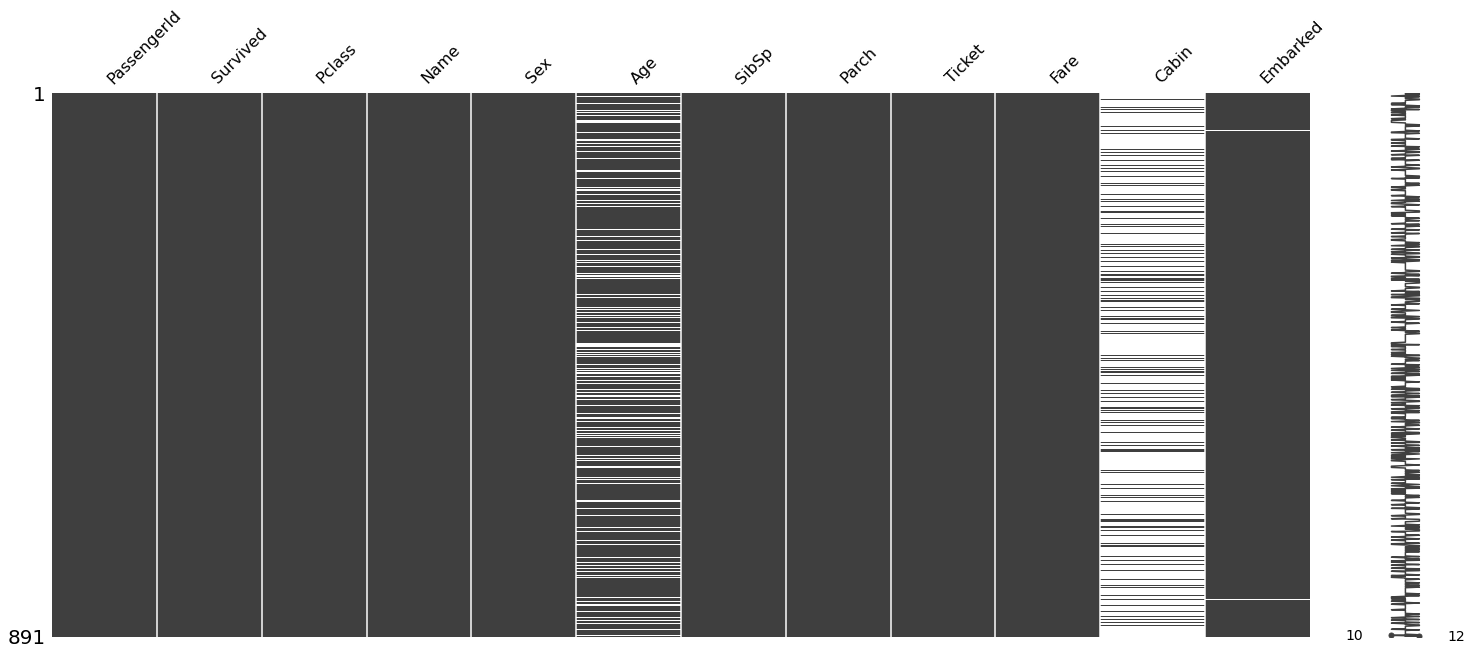

In [12]:
msno.matrix(df)

# Exploratory Data Analysis

### Numerical
    - Discrete
        - Parch
        - SibSp
        - Age
    - Continuous
        - Fare

### Categorical
    - Nominal
        - Sex
        - Embarked
        - Survived
    - Ordinal
        - Pclass
        - Cabin
        - Ticket

## How many survived?

[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

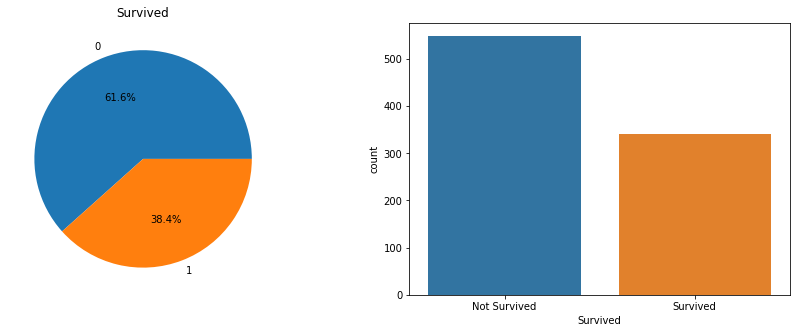

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_xticklabels(['Not Survived','Survived'])

From the above piechart and countplot, it is clear that out of 891 passengers in the observed dataset, only around 350 passengers have survived i.e only around 38.4% of the passengers survived and 61.6% of the passengers ended up dying.

### Analyzing the target column with respect to to other columns

#### With Sex

In [14]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

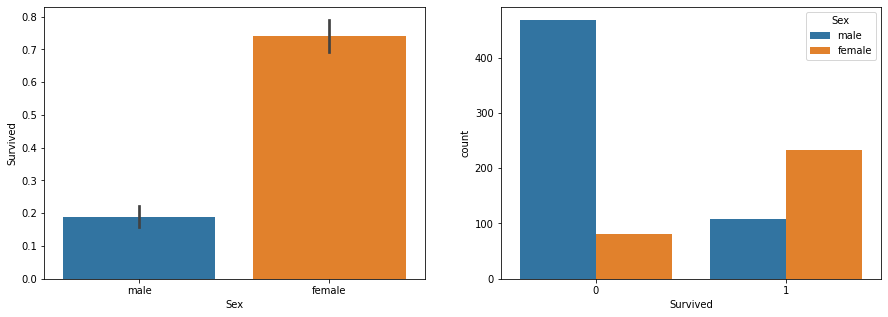

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(y='Survived',x='Sex',data=df,ax=ax[0])
sns.countplot(x='Survived',hue='Sex',data=df,ax=ax[1])

Here, we can see that only about 20% of the male survived and about 75% of the female populations have survived. From the countplot we can also see that the no of female surivors are twice or more than that of the male survivors.

### with Pclass

In [16]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

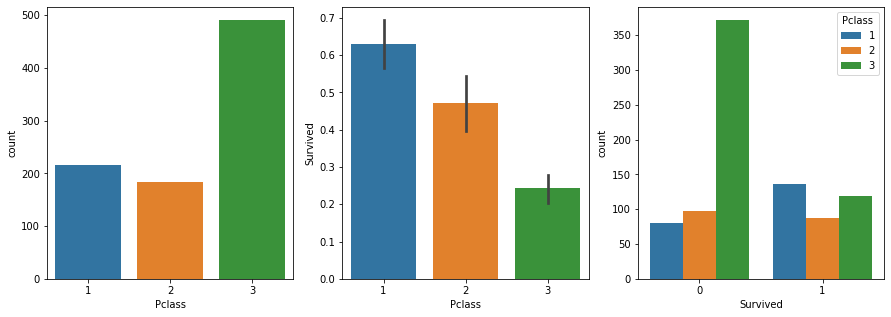

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Pclass',data=df,ax=ax[0])
sns.barplot(y='Survived',x='Pclass',data=df,ax=ax[1])
sns.countplot(x='Survived',hue='Pclass',data=df,ax=ax[2])

Here, we can see from the above plot that the number of passengers belonging to the 3rd class are higher than the number of passengers for both 1st and 2nd class  passengers. We can also see from the barplot and the countplot in the 2nd and 3rd figure that the survavility rate of the 1st class passengers are higher than that of 2nd and 3rd class passengers.

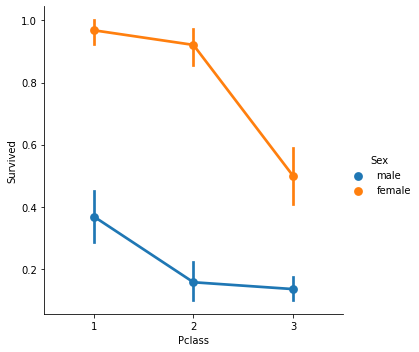

In [18]:
sns.catplot(x='Pclass',y='Survived',data=df,kind='point',hue='Sex')

From the above catplot, we can say that the the survival rate for Females belonging to the 1st class is the highest out of all the possibiliites and the survival rate of men belonging to the 3rd class is the lowest.

Also, from the plot we can alse see that irrespective of the class the passenger belongs to, females are the most likely to survive thatn the male.

### Analyzing Age

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Pclss and Age vs Sex')

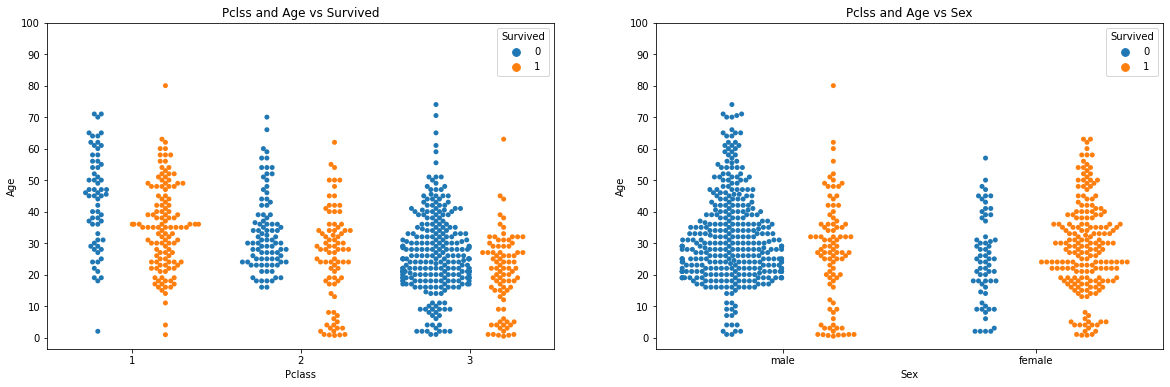

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.swarmplot(x='Pclass',y='Age',hue='Survived',split=True,data=df,ax=ax[0])
ax[0].set_yticks(np.arange(0,110,10))
ax[0].set_title('Pclss and Age vs Survived')
sns.swarmplot(x='Sex',y='Age',hue='Survived',split=True,data=df,ax=ax[1])
ax[1].set_yticks(np.arange(0,110,10))
ax[1].set_title('Pclss and Age vs Sex')

- From the swarmplot on the left, we can see that the number of children increases with the Pclass and that the survavilibilty of the children below 10 years looks good regarless of the Pclass. 
- From the swarmplot on the right, it is evident that the survial rate is high for pasengers between 20-40 and that survavility rate decreases as it goes updwards from that point onwards specially for men.

In [20]:
pd.cut(df['Age'],10).value_counts()

(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

([<matplotlib.axis.YTick at 0x2013f40d6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

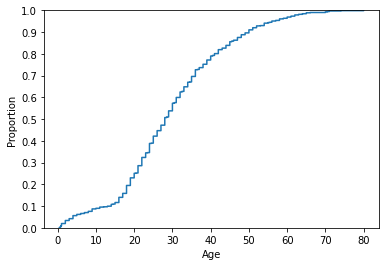

In [21]:
sns.ecdfplot(x='Age',data=df)
plt.yticks(np.arange(0,1.1,0.1))

From the above estimator of the Cumulative Distribution Function plot we can see that about 95% of the passengers are under the age of 50 

### Analyzing the survival rate based on 'Embarked' - the point of boarding the ship

In [22]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

([<matplotlib.axis.YTick at 0x2013f4e18e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

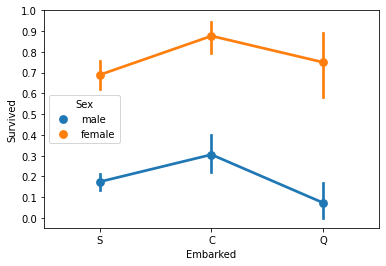

In [23]:
sns.pointplot(x='Embarked',y='Survived',data=df,hue='Sex')
plt.yticks(np.arange(0.0,1.1,0.1))

Here, from the above plot it is clear that the survival rate for the point of embarkation C is higher. 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

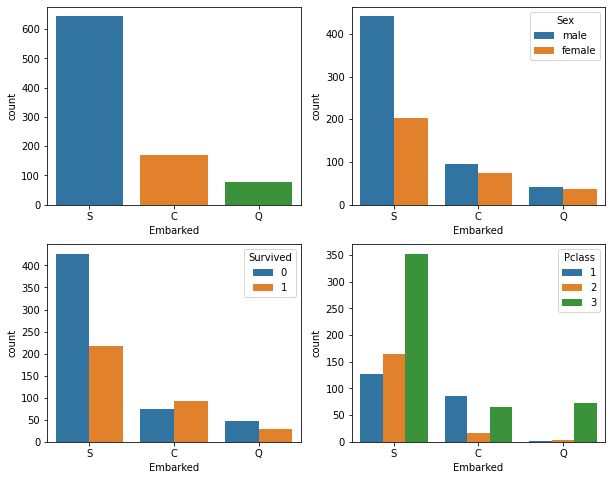

In [24]:
fig,ax= plt.subplots(2,2,figsize=(10,8))
sns.countplot(x='Embarked',data=df,ax=ax[0][0])
sns.countplot(x='Embarked',hue='Sex',data=df,ax=ax[0][1])
sns.countplot(x='Embarked',hue='Survived',data=df,ax=ax[1][0])
sns.countplot(x='Embarked',hue='Pclass',data=df,ax=ax[1][1])

From the above plots we can see that, maximum no of passengers boarded at embarkation point S and equal number of male and female passengers boarded ad embarkation point Q. 

### Analyzing the Sibling/Spouse column SibSp

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df.groupby(df.SibSp)['SibSp'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [27]:
pd.crosstab([df.SibSp],df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

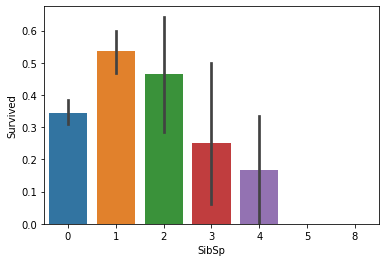

In [28]:
sns.barplot(x='SibSp',y='Survived',data=df)

Here, from the above barplot we can see that the survival rate for the person with 0 siblings/spouse is at around 35% and for 1 sibling/spouse is about 52% and after that as the no of siblins/spouse increases the survivality rate decreases.

### Analyzing the Parch - no of parents

In [29]:
pd.crosstab(df.Parch,df.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

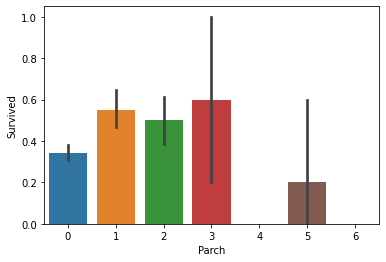

In [30]:
sns.barplot(x='Parch',y='Survived',data=df)

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

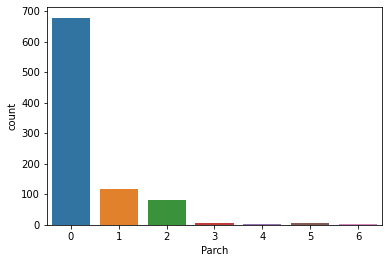

In [31]:
sns.countplot('Parch',data=df)

From the above plot, we can see that more than 650 passengers have boarded the ship alone.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

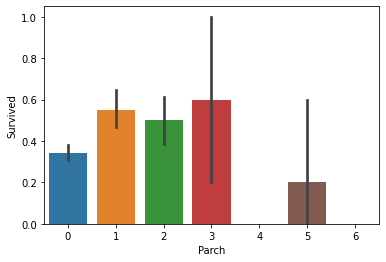

In [32]:
sns.barplot(x='Parch',y='Survived',data=df)

Here, from above bar plot it is clear that the survival rate of the passenger goes up with the number of parents onboard.

### Fare

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, 'Fare vs Pclass=3')

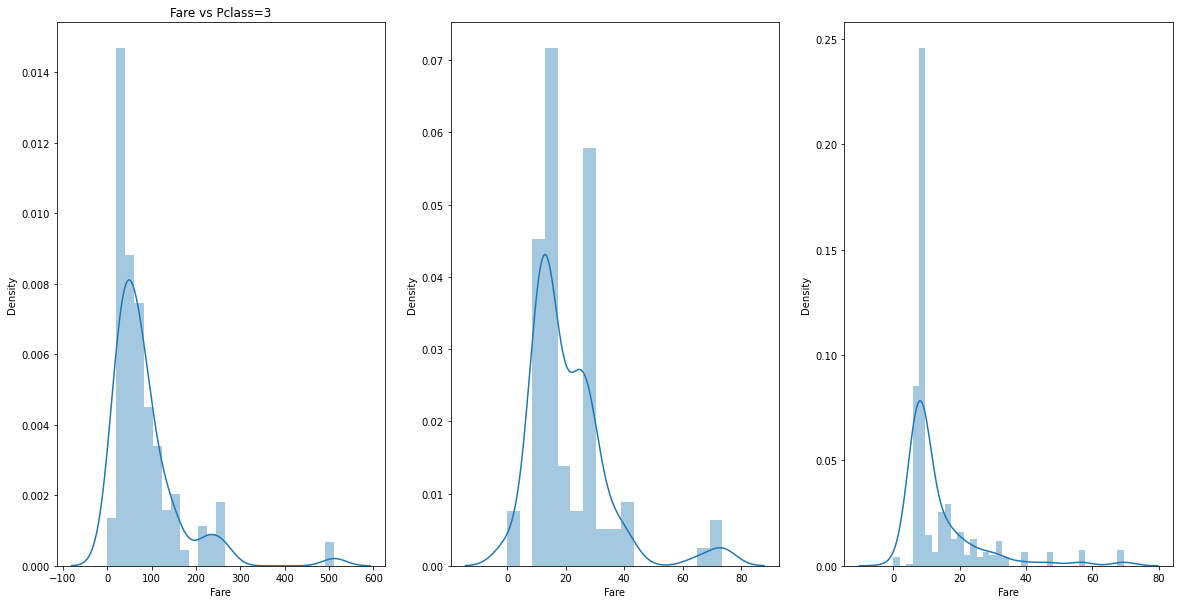

In [33]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare vs Pclass=1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[0].set_title('Fare vs Pclass=2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[0].set_title('Fare vs Pclass=3')

### Checking the correaltion between the features

<AxesSubplot:>

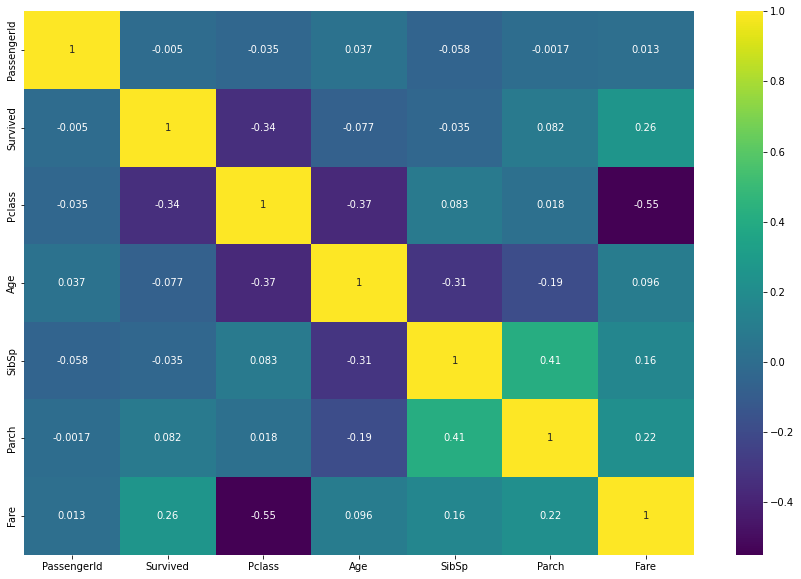

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### Visualzing the Missing Values

<AxesSubplot:>

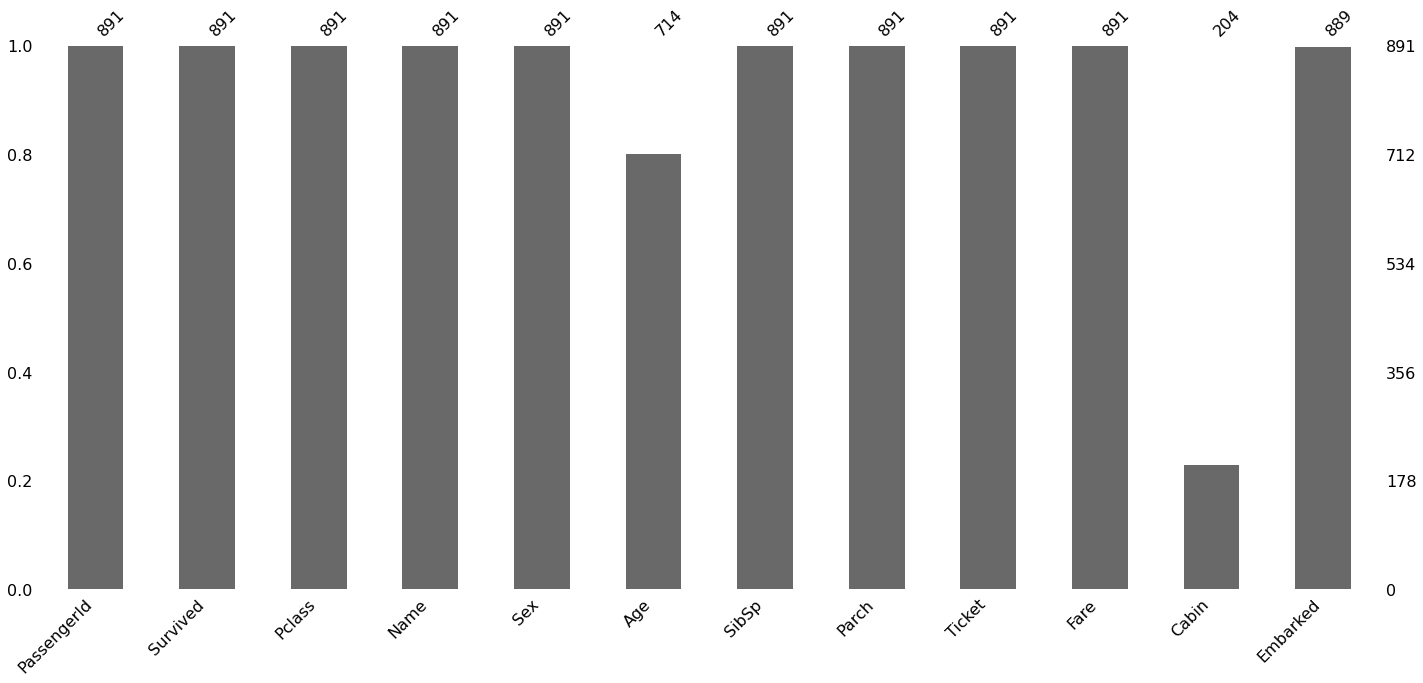

In [35]:
msno.bar(df)

<AxesSubplot:>

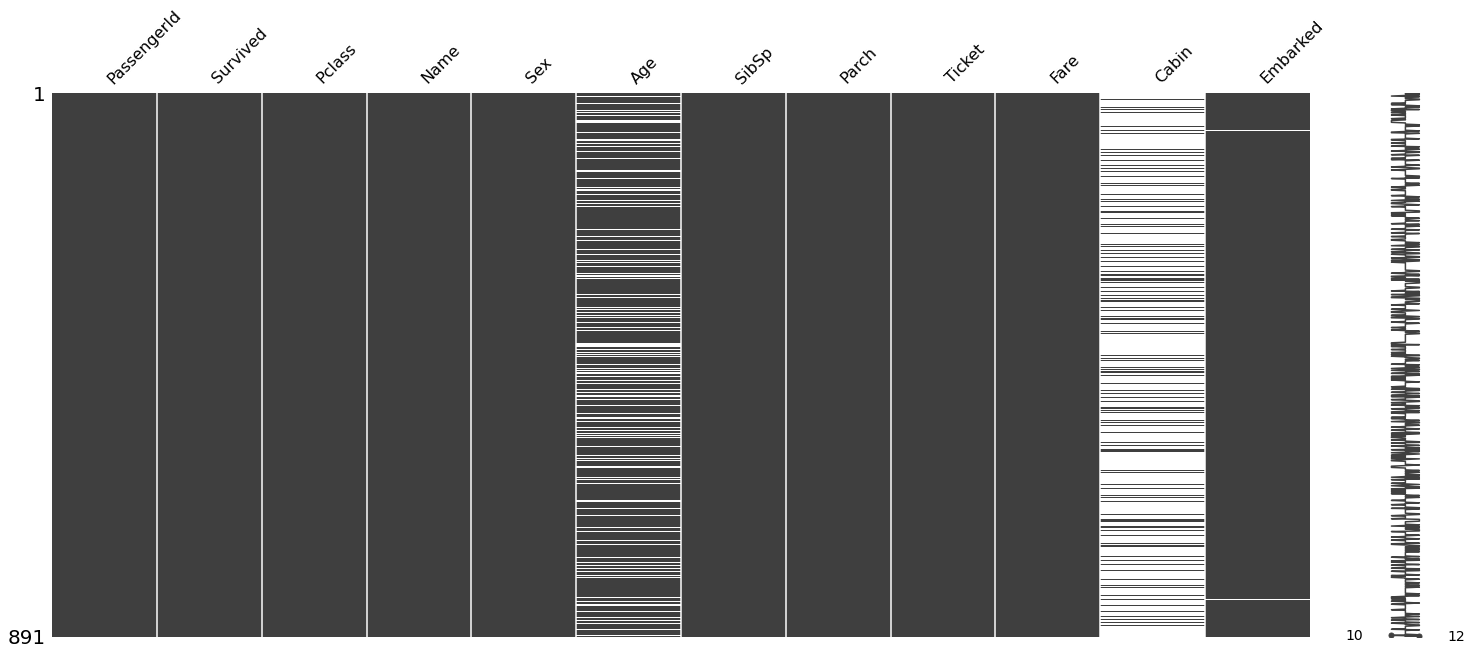

In [36]:
msno.matrix(df)

## Handling Missing Values

#### in Embarked

In [37]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [38]:
df[(df.Pclass==1) & (df.Sex=='female')]['Embarked'].value_counts().index[0]

'S'

In [39]:
fill_embarked = df[(df.Pclass==1) & (df.Sex=='female')]['Embarked'].value_counts().index[0]
fill_embarked

'S'

#### Filling missing values in Embarked with the most frequent values where Pclass = 1 and Sex = female

In [40]:
df.Embarked.isnull().sum()

2

In [41]:
df['Embarked'].fillna(fill_embarked, inplace=True)

In [42]:
df.Embarked.isnull().sum()

0

In [43]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### in Age column

In [44]:
df.Age.isnull().sum()

177

In [45]:
df[~df.Age.isnull()].groupby(['Sex','Pclass'])['Age'].agg(['mean','median'])

mean  median
Sex    Pclass                   
female 1       34.611765    35.0
       2       28.722973    28.0
       3       21.750000    21.5
male   1       41.281386    40.0
       2       30.740707    30.0
       3       26.507589    25.0

In [46]:
female_mean_age_dict = df[~df.Age.isnull()].groupby(['Sex','Pclass'])['Age'].agg(['mean','median']).loc['female','mean'].to_dict()
female_mean_age_dict

{1: 34.61176470588235, 2: 28.722972972972972, 3: 21.75}

In [47]:
male_mean_age_dict=df[~df.Age.isnull()].groupby(['Sex','Pclass'])['Age'].agg(['mean','median']).loc['male','mean'].to_dict()
male_mean_age_dict

{1: 41.28138613861386, 2: 30.74070707070707, 3: 26.507588932806325}

### Filling missing values in Age column

In [48]:
df.loc[(df.Age.isnull()) & (df.Pclass==1) & (df.Sex=='female'),'Age']=female_mean_age_dict[1]
df.loc[(df.Age.isnull()) & (df.Pclass==2) & (df.Sex=='female'),'Age']=female_mean_age_dict[2]
df.loc[(df.Age.isnull()) & (df.Pclass==3) & (df.Sex=='female'),'Age']=female_mean_age_dict[3]

df.loc[(df.Age.isnull()) & (df.Pclass==1) & (df.Sex=='male'),'Age']=male_mean_age_dict[1]
df.loc[(df.Age.isnull()) & (df.Pclass==2) & (df.Sex=='male'),'Age']=male_mean_age_dict[2]
df.loc[(df.Age.isnull()) & (df.Pclass==3) & (df.Sex=='male'),'Age']=male_mean_age_dict[3]

In [49]:
df.Age.isnull().sum()

0

<AxesSubplot:>

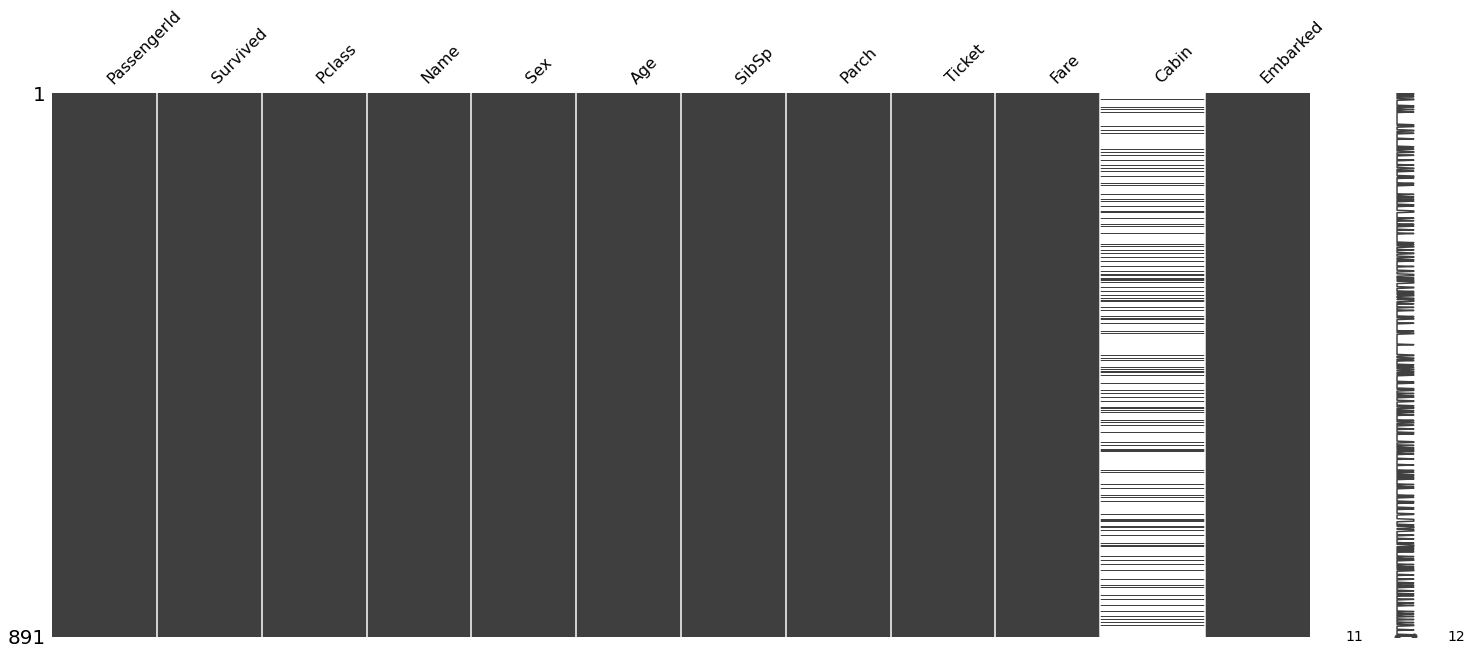

In [50]:
msno.matrix(df)

#### in Cabin column

In [51]:
df.Cabin.isnull().sum()

687

In [52]:
df.Cabin.isnull().mean()

0.7710437710437711

The above statistics shows that around 77% of the Cabin values are missing values.

In [53]:
df.Cabin.nunique()

147

In [54]:
df.Cabin.str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [55]:
df['Cabin']=df.Cabin.apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [56]:
df.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## Handling Outliers

#### In Age Column

<AxesSubplot:ylabel='Age'>

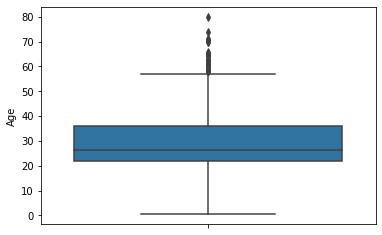

In [57]:
sns.boxplot(y=df['Age'])

In [58]:
import scipy.stats as stat
import pylab

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


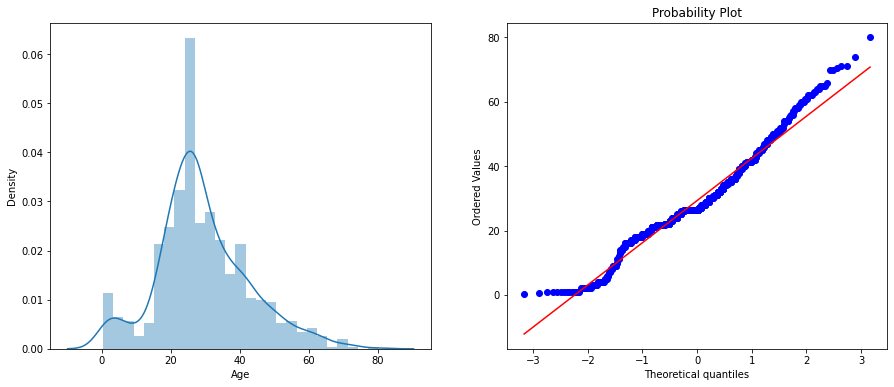

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
stat.probplot(df['Age'],dist='norm',plot=pylab)
plt.show()

In [60]:
df.Age.describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Since, the distribution for Age seems to be a Normal/Gaussain Distribution we can caculate boundaries which differentiates the outliers.

Gaussian distribution states that 
- 68% of the data lies within the 1st standard deviation away from the mean
- 95.7% of the data lies within the 1st standard deviation away from the mean
- 99% of the data lies within the 1st standard deviation away from the mean


In [61]:
df.Age.mean() - 3 * df.Age.std(), df.Age.mean() + 3 * df.Age.std()

(-10.524665564358248, 69.16195099764654)

In [62]:
lower_boundary = df.Age.mean() - 3 * df.Age.std()
upper_boundary = df.Age.mean() + 3 * df.Age.std()

In [63]:
lower_boundary, upper_boundary

(-10.524665564358248, 69.16195099764654)

In [64]:
df[df['Age']>upper_boundary]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,M,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,M,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,M,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,M,S


In [65]:
df['Age'] = df.Age.clip(0,upper_boundary)

In [75]:
df.groupby('Ticket')['Ticket'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket, Length: 891, dtype: int64

In [78]:
df['Name'].str[:20]

0      Braund, Mr. Owen Har
1      Cumings, Mrs. John B
2      Heikkinen, Miss. Lai
3      Futrelle, Mrs. Jacqu
4      Allen, Mr. William H
               ...         
886    Montvila, Rev. Juoza
887    Graham, Miss. Margar
888    Johnston, Miss. Cath
889    Behr, Mr. Karl Howel
890     Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [101]:
df_dropped = df.drop(['Name','Ticket'],axis=1)
df_dropped

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.00,1,0,7.2500,M,S
1,2,1,1,female,38.00,1,0,71.2833,C,C
2,3,1,3,female,26.00,0,0,7.9250,M,S
3,4,1,1,female,35.00,1,0,53.1000,C,S
4,5,0,3,male,35.00,0,0,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.00,0,0,13.0000,M,S
887,888,1,1,female,19.00,0,0,30.0000,B,S
888,889,0,3,female,21.75,1,2,23.4500,M,S
889,890,1,1,male,26.00,0,0,30.0000,C,C


### Handling Categorical Features

In [102]:
df_dropped

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.00,1,0,7.2500,M,S
1,2,1,1,female,38.00,1,0,71.2833,C,C
2,3,1,3,female,26.00,0,0,7.9250,M,S
3,4,1,1,female,35.00,1,0,53.1000,C,S
4,5,0,3,male,35.00,0,0,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.00,0,0,13.0000,M,S
887,888,1,1,female,19.00,0,0,30.0000,B,S
888,889,0,3,female,21.75,1,2,23.4500,M,S
889,890,1,1,male,26.00,0,0,30.0000,C,C


In [103]:
df_dropped.index = df_dropped['PassengerId']

In [104]:
df_dropped.drop(['PassengerId'],axis=1,inplace=True)

In [105]:
df_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,M,S
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,M,S
4,1,1,female,35.0,1,0,53.1000,C,S
5,0,3,male,35.0,0,0,8.0500,M,S


In [106]:
df_dropped.Cabin.nunique(),df_dropped.Embarked.nunique(),df_dropped.Sex.nunique()

(9, 3, 2)

In [107]:
df_converted = pd.get_dummies(df_dropped[['Embarked','Sex','Cabin']],drop_first=True)

In [108]:
df_converted

,Embarked_Q,Embarked_S,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T
PassengerId,,,,,,,,,,,
1,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,1,0,0,0,0,0,0,1,0
888,0,1,0,1,0,0,0,0,0,0,0
889,0,1,0,0,0,0,0,0,0,1,0


In [109]:
df_converted = pd.concat([df_dropped,df_converted],axis=1)
df_converted.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,M,S,0,1,1,0,0,0,0,0,0,1,0
2,1,1,female,38.0,1,0,71.2833,C,C,0,0,0,0,1,0,0,0,0,0,0
3,1,3,female,26.0,0,0,7.9250,M,S,0,1,0,0,0,0,0,0,0,1,0
4,1,1,female,35.0,1,0,53.1000,C,S,0,1,0,0,1,0,0,0,0,0,0
5,0,3,male,35.0,0,0,8.0500,M,S,0,1,1,0,0,0,0,0,0,1,0


In [110]:
df_converted=df_converted.drop(['Sex','Cabin','Embarked'],axis=1)

In [111]:
df_converted.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,0,1,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,1,1,0,0,0,0,0,0,1,0


### Feature Selection

<AxesSubplot:>

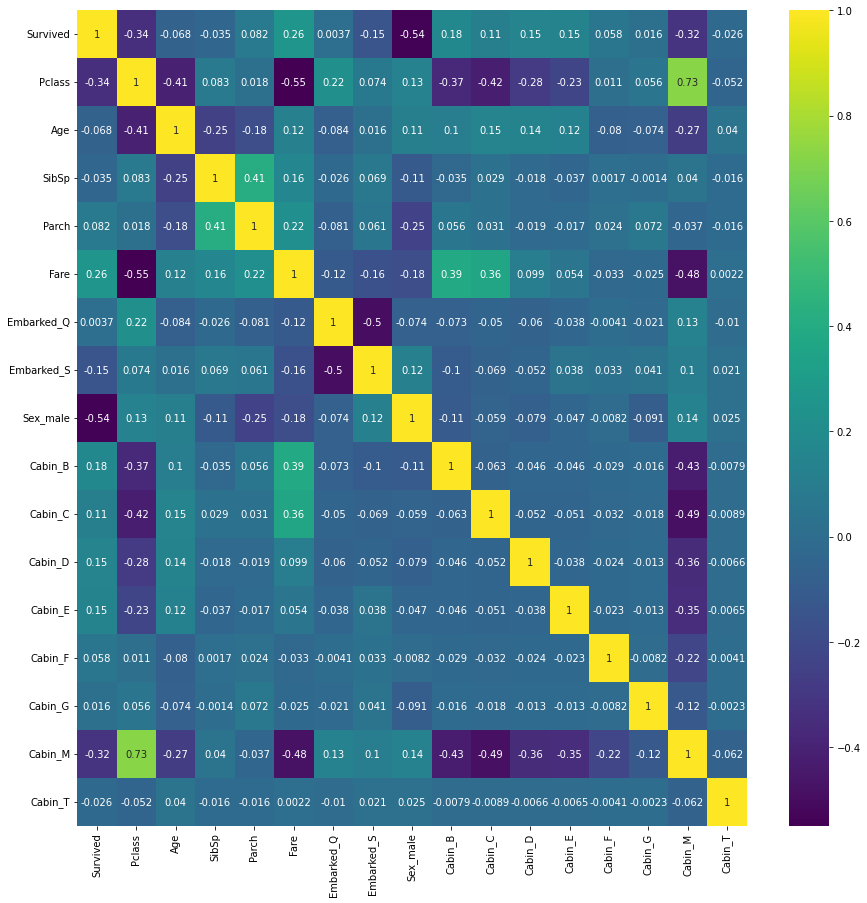

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(df_converted.corr(),cmap='viridis',annot=True)

In [132]:
## with the following function we can select highly correlated features 
## it will remove the first feature that is correlated with any other feature
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [144]:
corr_features = correlation(df_converted,0.7)
corr_features

{'Cabin_M'}